In [166]:
import pandas as pd
import numpy as np

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

Use pydataset to load the voteincome dataset.
> from pydataset import data

>data('voteincome', show_doc=True)

> data('voteincome')

In [121]:
data("voteincome", show_doc=True)

voteincome

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Sample Turnout and Demographic Data from the 2000 Current Population Survey

### Description

This data set contains turnout and demographic data from a sample of
respondents to the 2000 Current Population Survey (CPS). The states
represented are South Carolina and Arkansas. The data represent only a sample
and results from this example should not be used in publication.

### Usage

    data(voteincome)

### Format

A data frame containing 7 variables ("state", "year", "vote", "income",
"education", "age", "female") and 1500 observations.

`state`

a factor variable with levels equal to "AR" (Arkansas) and "SC" (South
Carolina)

`year`

an integer vector

`vote`

an integer vector taking on values "1" (Voted) and "0" (Did Not Vote)

`income`

an integer vector ranging from "4" (Less than \$5000) to "17" (Greater than
\$75000) denoting family income. See the CPS codebook for more info

In [122]:
df = data("voteincome")

In [123]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 1 to 1500
Data columns (total 7 columns):
state        1500 non-null object
year         1500 non-null int64
vote         1500 non-null int64
income       1500 non-null int64
education    1500 non-null int64
age          1500 non-null int64
female       1500 non-null int64
dtypes: int64(6), object(1)
memory usage: 93.8+ KB


,state,year,vote,income,education,age,female
1,AR,2000,1,9,2,73,0
2,AR,2000,1,11,2,24,0
3,AR,2000,0,12,2,24,1
4,AR,2000,1,16,4,40,0
5,AR,2000,1,10,4,85,1


Drop the state and year columns.

In [124]:
df.drop(columns=["state","year"], inplace=True)

In [125]:
df.vote.value_counts()

1    1283
0     217
Name: vote, dtype: int64

Split the data into train and test datasets. We will be predicting whether or not someone votes based on the the remaining features.

In [126]:
train, test = train_test_split(df, train_size = .70, random_state=42)

In [127]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1050 entries, 486 to 1127
Data columns (total 5 columns):
vote         1050 non-null int64
income       1050 non-null int64
education    1050 non-null int64
age          1050 non-null int64
female       1050 non-null int64
dtypes: int64(5)
memory usage: 49.2 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 1117 to 1499
Data columns (total 5 columns):
vote         450 non-null int64
income       450 non-null int64
education    450 non-null int64
age          450 non-null int64
female       450 non-null int64
dtypes: int64(5)
memory usage: 21.1 KB


In [128]:
X_train = train.drop("vote", axis=1)
y_train = train[["vote"]]
X_test = test.drop("vote", axis=1)
y_test = test[["vote"]]

Fit a k-neighbors classifier on the training data. Use 4 for your number of neighbors. How accurate is your model? How does it perform on the test data?

In [129]:
knn = KNeighborsClassifier(n_neighbors=4)

In [130]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [131]:
knn.score(X_train, y_train)

0.8790476190476191

In [132]:
accuracy_score(y_train, knn.predict(X_train))

0.8790476190476191

In [134]:
knn.score(X_test, y_test)

0.8688888888888889

Try our these values for k: 1, 2, 3, and 4. Which gives the best accuracy? Which gives the best accuracy on the test data set?

In [145]:
# one neighbor
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knn.score(X_train, y_train)

0.9809523809523809

In [146]:
knn.score(X_test, y_test)

0.8688888888888889

In [147]:
# two neighbor
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
knn.score(X_train, y_train)

0.9247619047619048

In [148]:
knn.score(X_test, y_test)

0.7888888888888889

In [149]:
# three neighbor
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
knn.score(X_train, y_train)

0.92

In [150]:
knn.score(X_test, y_test)

0.8022222222222222

In [151]:
# four neighbor
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
knn.score(X_train, y_train)

0.8790476190476191

In [152]:
knn.score(X_test, y_test)

0.7688888888888888

View the classification report for your best model.

> from sklearn.metrics import classifciation_report

> print(classification_report(y, predictions))

In [153]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knn.score(X_train, y_train)

0.9809523809523809

In [154]:
train_predict = knn.predict(X_train)
test_predict = knn.predict(X_test)

In [155]:
print(classification_report(y_train.vote, train_predict))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       140
           1       0.99      0.99      0.99       910

    accuracy                           0.98      1050
   macro avg       0.96      0.96      0.96      1050
weighted avg       0.98      0.98      0.98      1050



Within our problem space, what does accuracy mean? Precision? Recall?

In [156]:
from sklearn import __version__

In [157]:
__version__

'0.21.3'

precision - of the times we predicted someone was going to vote, we predicted correctly 99% of the time

recall - of the people that voted, we correctly predicted that 99% of them would vote

In [161]:
# globally defined variables
def test_score(neighbors):
    model = KNeighborsClassifier(n_neighbors=neighbors)
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

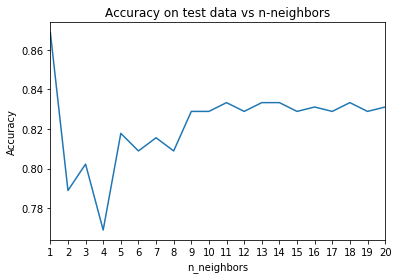

In [173]:
pd.Series({n: test_score(n) for n in range(1,21)}).plot()
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.xticks(range(1,21))
plt.title("Accuracy on test data vs n-neighbors")
plt.show()